In [63]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# More females than males visit Necter

In [64]:
import pandas as pd

dfs = pd.read_excel('/home/saket/BISC104-Session01-Thursday-A.xlsx', sheet_name=[1, 2, 3, 4, 5, 6,
                                                                                 7, 8, 9, 10, 11, 12])

sheet_number_to_name = {1: 'Mingyu Park',
                        2: 'William Garrick',
                        3: 'Mariah & Ahmed',
                        4: 'Reem AlFaisal',
                        5: 'Sophia and Catherine',
                        6: 'Jesus Juarez',
                        7: 'Reagor Wagnon',
                        8: 'Yuyuan Chen',
                        9: 'Gus and Vedika',
                       10: 'Zak Cook',
                       11: 'Sam Gholami',
                       12: 'Hannah Sobelman and Erin Philen'}

master_dfs = []
for key in dfs.keys():
    df = dfs[key]
    df.columns = list(map(lambda x: x.replace(' ',''), df.columns))
    df['sheet_name'] = sheet_number_to_name[key]
    try:
        df['Time'] = df['Time'].str.replace(' ','') 
    except:
        print(df.columns)
    df['start'] , df['end'] = df['Time'].str.split('-', 1).str
    master_dfs.append(df)
    


In [65]:
master_df = pd.concat(master_dfs)
master_df.Day = master_df.Day.str.replace(' ', '')
master_df = master_df.drop(columns=['Time'])

In [66]:
master_df = master_df.sort_values(by=['start', 'Day'])

In [67]:
print(master_df.reset_index(drop=True).to_latex(index=False))

\begin{tabular}{lrrlll}
\toprule
       Day &  \#Skateboarders &  \#Bikeriders &                       sheet\_name &  start &    end \\
\midrule
 Wednesday &              17 &           13 &                     Jesus Juarez &  10:00 &  10:05 \\
   Tuesday &              29 &           23 &             Sophia and Catherine &  10:35 &  10:50 \\
    Friday &              37 &           43 &                         Zak Cook &  10:50 &  11:00 \\
 Wednesday &              15 &           14 &                  William Garrick &  11:00 &  11:05 \\
 Wednesday &              21 &           42 &                    Reem AlFaisal &  11:00 &  11:10 \\
 Wednesday &               9 &           37 &                      Sam Gholami &  11:02 &  11:07 \\
    Friday &              32 &           47 &             Sophia and Catherine &  11:15 &  11:25 \\
   Tuesday &              23 &           79 &                      Sam Gholami &  11:30 &  11:40 \\
   Tuesday &              34 &           52 &          

In [68]:
master_df = master_df.rename(columns={'#Skateboarders': 'Skateboarders', '#Bikeriders': 'Bikeriders'})

In [69]:
master_df.head()

,Day,Skateboarders,Bikeriders,sheet_name,start,end
2,Wednesday,17,13,Jesus Juarez,10:00,10:05
1,Tuesday,29,23,Sophia and Catherine,10:35,10:50
0,Friday,37,43,Zak Cook,10:50,11:00
2,Wednesday,15,14,William Garrick,11:00,11:05
2,Wednesday,21,42,Reem AlFaisal,11:00,11:10


In [70]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=2)

In [71]:
df_molten = pd.melt(master_df, id_vars=['Day', 'sheet_name', 'start', 'end'], 
                    value_vars=['Skateboarders', 'Bikeriders'])

In [72]:
pd.to_datetime('06:00')

Timestamp('2018-09-06 06:00:00')

In [73]:
df_molten['start_time'] = pd.to_datetime(df_molten['start'])
df_molten['end_time'] = pd.to_datetime(df_molten['end'])

In [74]:
df_molten['delta'] = df_molten['end_time'] - df_molten['start_time']

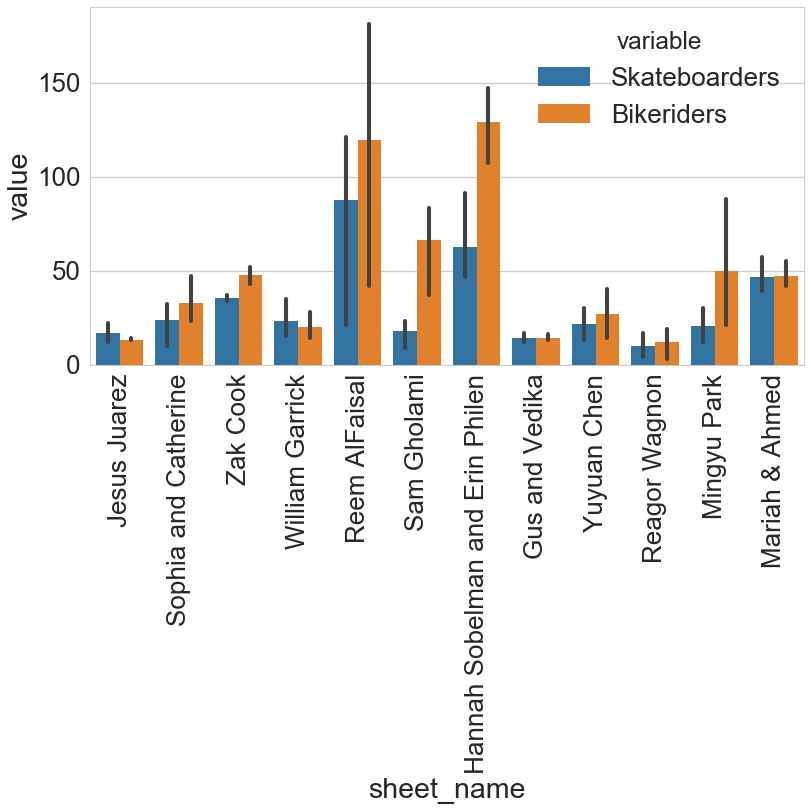

In [75]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(data=df_molten, hue='variable', x='sheet_name', y='value', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
fig.savefig('thursday_a_sheet_wise_plots.pdf')

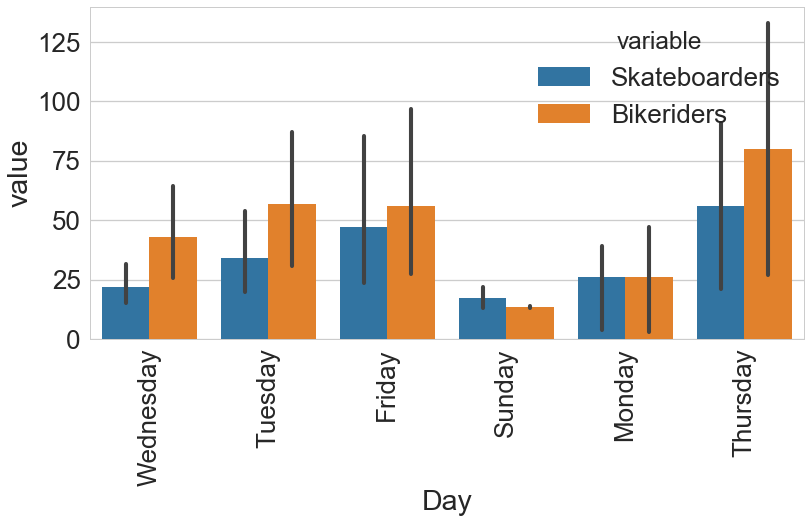

In [76]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_molten, hue='variable', x='Day', y='value', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
fig.savefig('thursday_a_day_wise_plots.pdf')

In [77]:
df_molten['delta_min'] = df_molten['delta'].dt.components.minutes
df_molten['normalized_value'] = df_molten['value']/df_molten['delta_min']

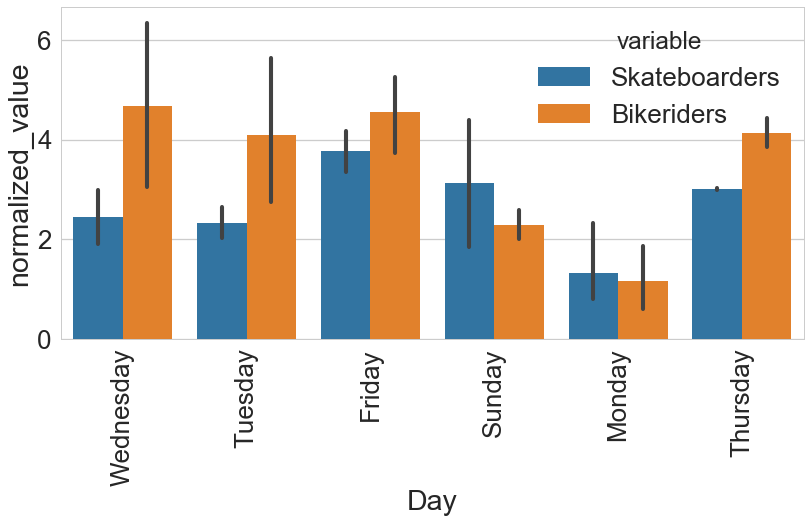

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(data=df_molten, hue='variable', x='Day', y='normalized_value', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
fig.savefig('thursday_a_day_wise_plots_normalized.pdf')

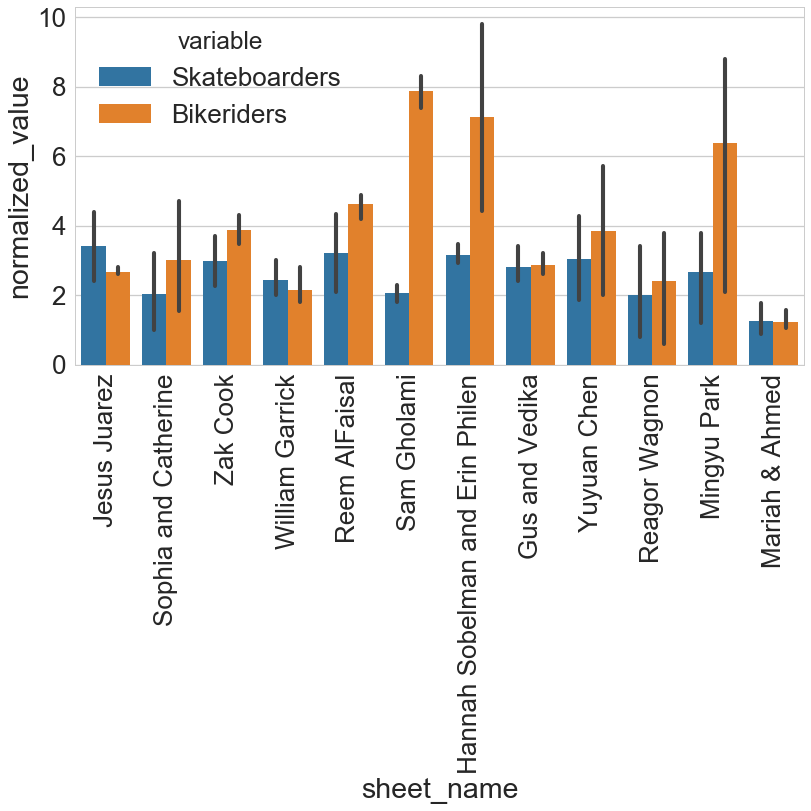

In [33]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(data=df_molten, hue='variable', x='sheet_name', y='normalized_value', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=90)

fig.tight_layout()
fig.savefig('thursday_a_sheet_wise_plots_normalized.pdf')

In [51]:
df_molten['start_hours'] = df_molten['start_time'].dt.hour

In [53]:
df_molten.head()

,Day,sheet_name,start,end,variable,value,start_time,end_time,delta,delta_min,normalized_value,start_hours
0,Wednesday,Jesus Juarez,10:00,10:05,Skateboarders,17,2018-09-06 10:00:00,2018-09-06 10:05:00,00:05:00,5,3.400000,10
1,Tuesday,Sophia and Catherine,10:35,10:50,Skateboarders,29,2018-09-06 10:35:00,2018-09-06 10:50:00,00:15:00,15,1.933333,10
2,Friday,Zak Cook,10:50,11:00,Skateboarders,37,2018-09-06 10:50:00,2018-09-06 11:00:00,00:10:00,10,3.700000,10
3,Wednesday,William Garrick,11:00,11:05,Skateboarders,15,2018-09-06 11:00:00,2018-09-06 11:05:00,00:05:00,5,3.000000,11
4,Wednesday,Reem AlFaisal,11:00,11:10,Skateboarders,21,2018-09-06 11:00:00,2018-09-06 11:10:00,00:10:00,10,2.100000,11


In [62]:
df_molten['subject'] = 0
df_molten.head()

,Day,sheet_name,start,end,variable,value,start_time,end_time,delta,delta_min,normalized_value,start_hours,subject
0,Wednesday,Jesus Juarez,10:00,10:05,Skateboarders,17,2018-09-06 10:00:00,2018-09-06 10:05:00,00:05:00,5,3.400000,10,0
1,Tuesday,Sophia and Catherine,10:35,10:50,Skateboarders,29,2018-09-06 10:35:00,2018-09-06 10:50:00,00:15:00,15,1.933333,10,0
2,Friday,Zak Cook,10:50,11:00,Skateboarders,37,2018-09-06 10:50:00,2018-09-06 11:00:00,00:10:00,10,3.700000,10,0
3,Wednesday,William Garrick,11:00,11:05,Skateboarders,15,2018-09-06 11:00:00,2018-09-06 11:05:00,00:05:00,5,3.000000,11,0
4,Wednesday,Reem AlFaisal,11:00,11:10,Skateboarders,21,2018-09-06 11:00:00,2018-09-06 11:10:00,00:10:00,10,2.100000,11,0


/home/saket/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


ValueError: Index contains duplicate entries, cannot reshape

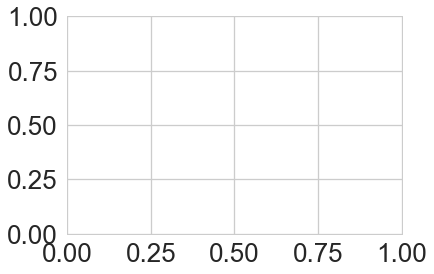

In [61]:
sns.tsplot(data=df_molten, time="start_hours", unit='subject', value="normalized_value")


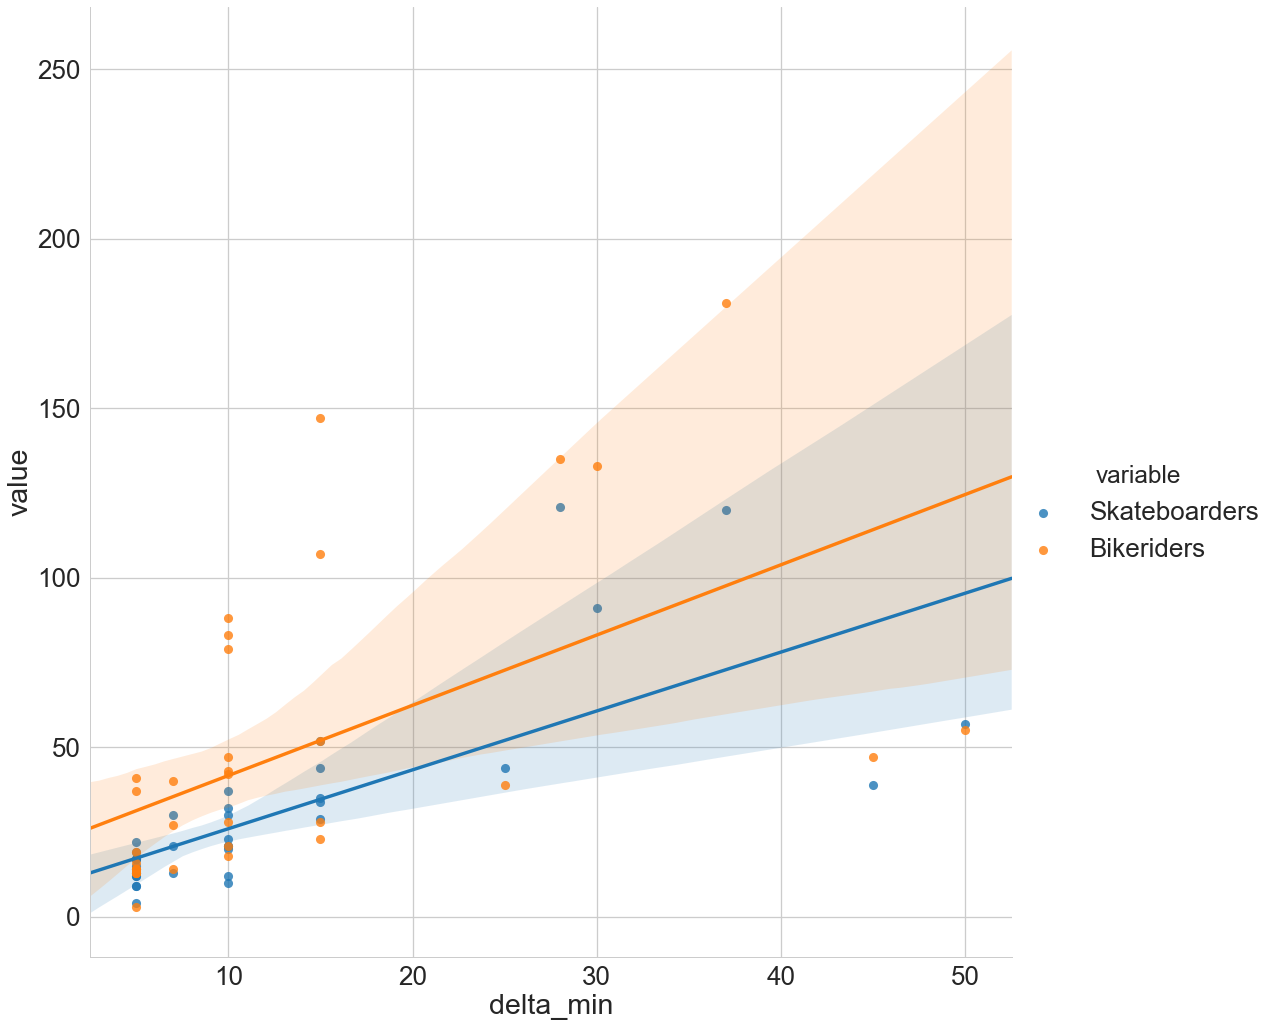

In [34]:
sns.lmplot(x="delta_min", y="value", hue="variable", data=df_molten, size=15)
plt.savefig('thursday_a_time_wise_plots.pdf')